# **!really OpenSource so no comments, sorry.**

In [1]:
!pip install gdown
!pip install PyMuPdf

     |████████████████████████████████| 6.4MB 5.8MB/s 


In [2]:
import gdown

url = ' https://drive.google.com/uc?id=1oYDEJVncC8MYLixdkHIoWRSxc66wb0iy'
output = 'requirements.txt'
gdown.download(url, output, quiet=False)

Downloading...
From:  https://drive.google.com/uc?id=1oYDEJVncC8MYLixdkHIoWRSxc66wb0iy
To: /content/requirements.txt
100%|██████████| 101/101 [00:00<00:00, 67.7kB/s]


'requirements.txt'

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 102kB 3.8MB/s 
     |████████████████████████████████| 163kB 5.7MB/s 
     |████████████████████████████████| 1.9MB 7.3MB/s 
  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=b8ded0b6f7c39f0f4956c5a934edf12c054b5746c81a3839522a2b854b05a299
  Stored in directory: /root/.cache/pip/wheels/ef/92/fc/271b3709e71a96ffe934b27818946b795ac6b9b8ff8682483f
Successfully built rake-nltk


In [4]:
import fitz
import spacy
# from nlp import nlp as nlp
from fuzzywuzzy import fuzz
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from spacy.matcher import PhraseMatcher
from collections import Counter
import Levenshtein as lev
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# LangProcessor = nlp()
Spnlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(Spnlp.vocab)

In [50]:
# Your DOCUMENT ID can be gotten from the 
# sharing link of your file uploaded to Google drive

DOCUMENT_ID = input("DOCUMENT ID: ")
url = ' https://drive.google.com/uc?id=' + DOCUMENT_ID
output = 'input.pdf'
gdown.download(url, output, quiet=False)

DOCUMENT ID: 1mKez6gz_W9bPOd6wnhbDLIz0qrUPIZfl


Downloading...
From:  https://drive.google.com/uc?id=1mKez6gz_W9bPOd6wnhbDLIz0qrUPIZfl
To: /content/input.pdf
100%|██████████| 130k/130k [00:00<00:00, 21.2MB/s]


'input.pdf'

In [51]:
def read_pdf_and_format(pdf_document):
  content = ""
  cnt = 0
  doc = fitz.open(pdf_document)
  while cnt < doc.pageCount:
    page = doc.loadPage(cnt)
    content = content + page.getText("text")
    cnt+=1
  return content

In [7]:
def clean_text(corpus):
  cleaned_text = ""
  for i in corpus:
    cleaned_text = cleaned_text + i.lower().replace("'", "")
  return cleaned_text

In [8]:
resume_text = read_pdf_and_format("input.pdf")
print(summarize(resume_text, ratio=0.2))

experience in Django,  Machine learning, Cloud Services and MLOps, 
utilizing efficient communication, leadership and network skills to 
- Worked with  my team to build projects on the GCP.
- Led a team of fellow developers on a community project which came 
Currently working as a contract developer for the early  medical startup 
- Implementing Agora RTC Engine for voice and video calls on both 
Currently working as a contract developer for the organization to create 
Worked as a contract developer for the early startup which is centered 
- Future implementation of a voice search system in the app 
● Flutter - Advanced Course - ​Udemy 
- Created two theme states (Dark and Light mode) for the app 
Worked as a contract developer to build a mobile application for the 
- Creating two theme modes for the app 
- Creating chained comments under videos in the app 
● Machine Learning Developer Intern - HNG Internships 
Deployed Machine Learning models (Recommender systems, Language 
● AWS Mach

In [9]:
job_description = input("JOB DESCRIPTION:\n\n")
print(summarize(clean_text(job_description), ratio=0.2))

JOB DESCRIPTION:

The AWS Mobile team is continuously innovating and expanding our mobile services to enable developers to quickly build, deploy, and manage native, web, and hybrid apps for iOS and Android. By leveraging our services, developers are able to easily deliver rich cloud-enabled experiences to their customers by integrating a broad range of AWS services into their apps including voice & chat capabilities, user engagement, analytics, push notifications, cloud storage, NoSQL databases, GraphQL, online/offline data synchronization and serverless business logic.  The AWS Mobile SDKs are currently being used by tens of thousands of developers and thousands of mobile apps. We need to grow in order to meet demand for our services and to build new features for our users. We have exciting new projects that will continue to simplify and speed the creation and management of cloud-enabled apps. This is a unique opportunity to join a team that is working to change the mobile industry; w

In [10]:
text_list = [resume_text, job_description]
cv = CountVectorizer()
count_matrix = cv.fit_transform(text_list)
matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
matchPercentage = round(matchPercentage, 2)
print(matchPercentage)

58.78


In [35]:
terms = keywords(job_description, ratio=0.25).split('\n')
patterns = [Spnlp.make_doc(t) for t in terms]
matcher.add("Spec", patterns)

doc = Spnlp(resume_text)
matchKeywords = []
matches = matcher(doc)

for match_id, start, end in matches:
  span = doc[start:end]
  if len(span.text) > 3:
    matchKeywords.append(span.text)

In [36]:
a = Counter(matchKeywords)
print(a)

Counter({'developer': 4, 'apps': 3, 'build': 2, 'working': 2, 'management': 2, 'experience': 1, 'learning': 1, 'communication': 1, 'leadership': 1, 'work': 1, 'projects': 1, 'industry': 1, 'search': 1, 'level': 1})


In [37]:
pd.DataFrame(pd.Series(dict(a)))

,0
experience,1
learning,1
communication,1
leadership,1
work,1
build,2
projects,1
working,2
developer,4
apps,3


In [38]:
vals = []
for key, val in a.items():
    rec = {}
    try:
      imp = pu[pu['text'] == key]['importance'].values[0]
    except:
      imp = None
    rec['word'] = key
    rec['importance'] = imp
    rec['influence'] = val 
    vals.append(rec) 

rData = pd.DataFrame(vals)
rData

,word,importance,influence
0,experience,3.5,1
1,learning,NaN,1
2,communication,NaN,1
3,leadership,NaN,1
4,work,2.0,1
5,build,NaN,2
6,projects,NaN,1
7,working,1.0,2
8,developer,NaN,4
9,apps,NaN,3


In [39]:
from textblob import TextBlob
from textblob import Word
import re
from nltk.corpus import stopwords
from textstat.textstat import textstat
from nltk.tokenize import WordPunctTokenizer
#import language_check
from nltk.stem import RegexpStemmer
st = RegexpStemmer('ing$|s$|e$|able$', min=4)
from nltk.stem.snowball import EnglishStemmer
snow = EnglishStemmer()
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from rake_nltk import Rake
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')

class nlp:

    
    def __init__(self):
        self.service = 'TextBlob NLP'
        self.pos_dict = {
            'CC' : 'Coordinating conjunction', 'CD' : 'Cardinal number', 'DT' : 'Determiner',
                'EX' : 'Existential there', 'FW' : 'Foreign word', 'IN' : 'Preposition or subordinating conjunction',
                'JJ' : 'Adjective', 'JJR' : 'Adjective, comparative', 'JJS' : 'Adjective, superlative',
                'LS' : 'List item marker', 'MD' : 'Modal', 'NN' : 'Noun, singular or mass', 'NNS' : 'Noun, plural',
                'NNP' : 'Proper noun, singular', 'NNPS' : 'Proper noun, plural', 'PDT' : 'Predeterminer', 'POS' : 'Possessive ending',
                'PRP' : 'Personal pronoun', 'PRP$' : 'Possessive pronoun', 'RB' : 'Adverb',
                'RBR' : 'Adverb, comparative', 'RBS' : 'Adverb, superlative', 'RP' : 'Particle',
                'SYM' : 'Symbol', 'TO' : 'to', 'UH' : 'Interjection', 'VB' : 'Verb, base form',
                'VBD' : 'Verb, past tense', 'VBG' : 'Verb, gerund or present participle', 'VBN' : 'Verb, past participle',
                'VBP' : 'Verb, non-3rd person singular present', 'VBZ' : 'Verb, 3rd person singular present',  'WDT' : 'Wh-determiner',
                'WP' : 'Wh-pronoun', 'WP$' : 'Possessive wh-pronoun',  'WRB' : 'Wh-adverb'
        }
        self.cachedStopWords = stopwords.words("english")
        #self.tool = language_check.LanguageTool('en-GB')
        self.rake = Rake() # Uses stopwords for english from NLTK, and all puntuation characters.
        
    def lang_detect(self,text): 
        giventext = TextBlob(text)
        return giventext.detect_language()

    def others(self,token):
        synonyms = []
        antonyms = []
        for syn in wordnet.synsets(token):
            for l in syn.lemmas():
                synonyms.append(l.name())
                if l.antonyms():
                    antonyms.append(l.antonyms()[0].name())
        return set(synonyms), set(antonyms)



    def lang_trans(self,text, target):
        giventext = TextBlob(text)
        try:
            trans = giventext.translate(to=target)
            return trans
        except:
            return text
        
    def lang_senti(self,text):
        giventext = TextBlob(text)
        senti = giventext.sentiment
        return senti
        
    def lang_spell(self,text):
        giventext = TextBlob(text)
        words = giventext.words
        corrections = []
        for w in words:
            word = Word(w)
            corr = word.spellcheck()
            if len(corr) > 1:
                corrections.append([word, corr])
        return corrections
 
    def lang_word_counts(self,text):
        giventext = TextBlob(text) 
        words = self.tokenize(text)
        unique_words = set(words)        
        word_freq = {}         
        for u in unique_words:
            word_freq[u] = giventext.words.count(u, case_sensitive=True)        
        return word_freq
     
    def lang_pos(self, text):
        giventext = TextBlob(text)
        tags = giventext.tags
        tag_anal = {}
        for tag in tags:
            try:
                tag_anal[self.pos_dict[tag[1]]] += 1
            except:
                tag_anal[self.pos_dict[tag[1]]] = 1
        return tag_anal
        
    def lang_sent(self, text):
        giventext = TextBlob(text)
        sentences = giventext.sentences
        sent = {}
        sent_senti = []
        sent['count'] = len(sentences)
        for sen in sentences:
            sent_senti.append([sen.string, round(sen.sentiment.polarity,2), round(sen.sentiment.subjectivity,2)])
        sent['sentiment'] = sent_senti    
        return sent        
        
        
    def lang_anal(self,text):
        anal = {}
        pol_rep = 0
        anal['lang'] = self.lang_detect(text)
        anal['original'] = text
        if anal['lang'] != 'en':
            anal['english'] = self.lang_trans(text,'en').string
            text = anal['english']
        sent = self.lang_senti(text)
        pol = round(sent.polarity,2)
        anal['tone'] = pol
        if (pol == 0):
            pol_rep = .5
        elif (pol < 0):
            pol_rep = abs(pol) / 2
        else:
            pol_rep = .5 + (pol / 2)
        anal['polarity'] = pol_rep
        sub = round(sent.subjectivity,2)
        if (sub <.01):
            sub = sub + .005
        anal['subjectivity'] = sub
        cor = self.lang_spell(text)
        if len(cor) > 0:
            anal['corrections'] = cor
        anal['frequencies'] = self.lang_word_counts(text)
        anal['pos'] = self.lang_pos(text)
        anal['sentences'] = self.lang_sent(text)
        anal['stats'] = self.stats(text)
        #anal['quality'] = self.lang_check(text)
        anal['phrases'] = self.keywords(text)
        return anal

 
    def tokenize(self, text):
         min_length = 5
         #tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
         words =  map(lambda word: word.lower(), WordPunctTokenizer().tokenize(text))
         #words = list(WhitespaceTokenizer().span_tokenize(text))
         #words = map(lambda word: word.lower(), word_tokenize(text));    
         #words = wordpunct_tokenize(text)
         #word_tokenize = Penn Treebank#
         #words = map(lambda word: word.lower(), tokenizer.tokenize(text));
         #words = list(parser.raw_parse(text,verbose=False))
         #words = map(lambda word: word.lower(), text.split())
         words = [word for word in words if word not in self.cachedStopWords]
             #tokens =(list(map(lambda token: PorterStemmer().stem(token),words)));
             #tokens =(list(map(lambda token: LancasterStemmer().stem(token),words)));
             #tokens =(list(map(lambda token: snow.stem(token),words)));
             #tokens =(list(map(lambda token: st.stem(token),words)));
         tokens =(list(map(lambda token: wnl.lemmatize(token),words)));
             #tokens=words
         p = re.compile('[a-zA-Z]+');
         filter_words = list(filter(lambda token: p.match(token) and len(token)>=min_length, tokens));
         return filter_words     
  
    def stats(self,text):
          test_data = text
          stats = {}
          stats['flesch_reading_ease'] = textstat.flesch_reading_ease(test_data)
          stats['smog'] = textstat.smog_index(test_data)
          stats['flesch kincaid'] = textstat.flesch_kincaid_grade(test_data) 
          stats['coleman Liau'] = textstat.coleman_liau_index(test_data)
          stats['automated'] = textstat.automated_readability_index(test_data)
          stats['dale chall'] = textstat.dale_chall_readability_score(test_data)
          stats['difficult'] = textstat.difficult_words(test_data)
          stats['linsear'] =  textstat.linsear_write_formula(test_data)
          stats['gunning_fog'] = textstat.gunning_fog(test_data)
          stats['standard'] =  textstat.text_standard(test_data)
          stats['charcount'] = textstat.char_count(test_data)
          stats['lexicon count'] = textstat.lexicon_count(test_data)
          stats['syllable count'] = textstat.syllable_count(test_data)
          stats['sentence count'] = textstat.sentence_count(test_data)
          stats['avg sentence length'] = textstat.avg_sentence_length(test_data)                
          stats['avg_syllables_per_word'] = textstat.avg_syllables_per_word(test_data)
          stats['avg_letter_per_word'] = textstat.avg_letter_per_word(test_data)
          stats['avg_sentence_per_word'] = textstat.avg_sentence_per_word(test_data)          
          return stats
  
    def lang_check(self,text):
        matches = self.tool.check(text)
        msgs = []
        new_text = language_check.correct(text, matches)
        for match in matches:
            msgs.append(match.msg)
        return new_text, msgs
          
    def keywords(self, text):
        keyword = {}
        self.rake.extract_keywords_from_text(text)
        keyword['ranked phrases'] = self.rake.get_ranked_phrases_with_scores()         
        return keyword

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
# from nlp import nlp as nlp
# LangProcessor = nlp()
keywordsJob = nlp().keywords(job_description)
keywordsCV = nlp().keywords(resume_text)

In [41]:
for item in keywordsCV['ranked phrases'][:10]:
 print (str(round(item[0],2)) + ' - ' + item[1] )

541.37 - cd ● linux ● aws ● gcp ● mlops ● gitlab ● bootstrap ● flutter ● communication ● leadership ● machine learning ● git education kwara state university ,​ nigeria
76.31 - adminixtrator skills ● restapi ● flask ● ci
53.44 - recent work history ● associate cloud engineer
46.02 - ​ udemy ● aws fundamental course
40.81 - ● aws machine learning
38.94 - nigeria 240241 ● linkedin
38.86 - ● machine learning developer intern
38.85 - request ● quest technology currently working
38.77 - ​ udemy ● python 3 course
37.12 - hng internships deployed machine learning models


In [42]:
sims = []
phrases = []
for key in keywordsJob['ranked phrases']:
  rec={}
  rec['importance'] = key[0]
  texts = key[1]
  sims=[]
  avg_sim=0
  for cvkey in keywordsCV['ranked phrases']:
    cvtext = cvkey[1]
    sims.append(fuzz.ratio(texts, cvtext))
      #sims.append(lev.ratio(texts.lower(),cvtext.lower()))
    #sims.append(jaccard_similarity(texts,cvtext))
  count=0
  for s in sims:
    count=count+s
  avg_sim = count/len(sims)
  rec['similarity'] = avg_sim
  rec['text'] = texts
  phrases.append(rec)

In [43]:
print(phrases)

[{'importance': 43.0, 'similarity': 21.52413793103448, 'text': 'high performance products requires exceptional technical expertise'}, {'importance': 34.83333333333333, 'similarity': 23.089655172413792, 'text': 'technical vision · influence technical strategy'}, {'importance': 26.714285714285715, 'similarity': 22.372413793103448, 'text': 'running quickly using aws services even'}, {'importance': 25.666666666666668, 'similarity': 22.282758620689656, 'text': 'practical experience building scalable software products'}, {'importance': 24.166666666666668, 'similarity': 22.73103448275862, 'text': 'delivering high quality technology solutions'}, {'importance': 21.72222222222222, 'similarity': 26.20689655172414, 'text': 'love · drive team discussions'}, {'importance': 20.666666666666668, 'similarity': 26.372413793103448, 'text': 'component design · lead development'}, {'importance': 15.5, 'similarity': 24.220689655172414, 'text': 'significant new architectural systems'}, {'importance': 15.5, 's

In [47]:
pd.DataFrame(phrases)

,importance,similarity,text
0,43.000000,21.524138,high performance products requires exceptional...
1,34.833333,23.089655,technical vision · influence technical strategy
2,26.714286,22.372414,running quickly using aws services even
3,25.666667,22.282759,practical experience building scalable softwar...
4,24.166667,22.731034,delivering high quality technology solutions
...,...,...,...
218,1.000000,18.558621,amplify
219,1.000000,23.124138,amazecon
220,1.000000,16.282759,aim
221,1.000000,23.496552,addition


In [48]:
tokensJob = nlp().tokenize(job_description)
tokensCv = nlp().tokenize(resume_text)
job = Counter(tokensJob).most_common(20)
cv = Counter(tokensCv).most_common(20)

data = []
for r in job:
    rec = {}
    rec['word'] = r[0]
    rec['from'] = 'job'
    rec['freq'] = r[1]
    data.append(rec)

for r in cv:
    rec = {}
    rec['word'] = r[0]
    rec['from'] = 'cv'
    rec['freq'] = r[1]
    data.append(rec)

In [49]:
pd.DataFrame(data)

,word,from,freq
0,mobile,job,10
1,service,job,8
2,developer,job,7
3,experience,job,6
4,product,job,6
5,mentor,job,5
6,build,job,3
7,cloud,job,3
8,customer,job,3
9,including,job,3


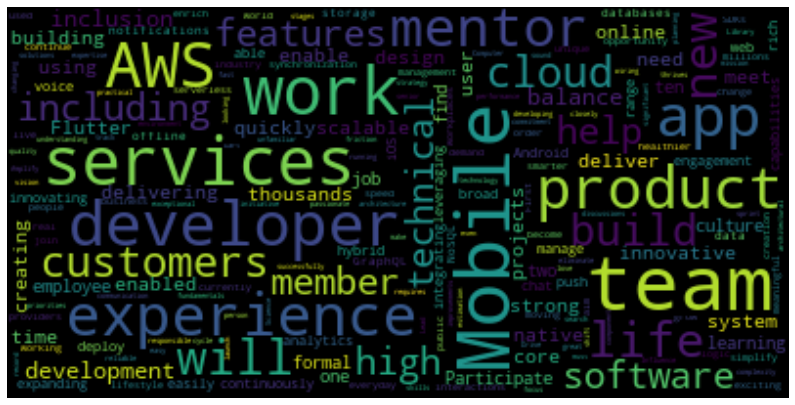

In [23]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(job_description)
plt.figure(figsize=(14,14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


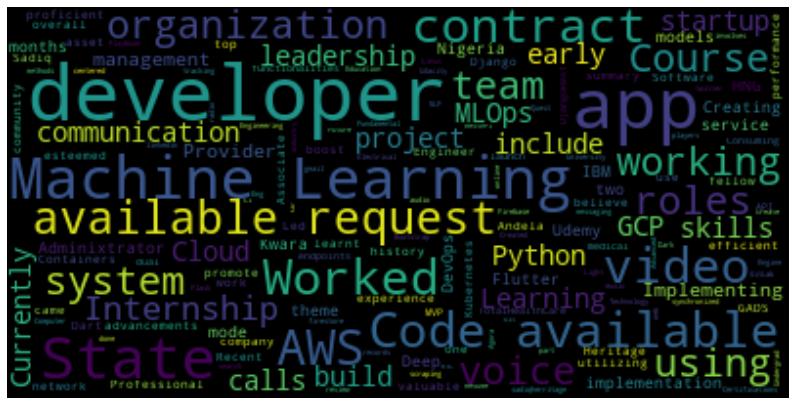

In [24]:
wordcloud = WordCloud(max_font_size=40).generate(resume_text)
plt.figure(figsize=(14,14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
df=pd.DataFrame(data)
pu=pd.DataFrame(phrases)

ph = pd.melt(pu[:10], id_vars=['text'], value_vars=['importance','similarity'])
pu.head(10)

,importance,similarity,text
0,43.000000,21.524138,high performance products requires exceptional...
1,34.833333,23.089655,technical vision · influence technical strategy
2,26.714286,22.372414,running quickly using aws services even
3,25.666667,22.282759,practical experience building scalable softwar...
4,24.166667,22.731034,delivering high quality technology solutions
5,21.722222,26.206897,love · drive team discussions
6,20.666667,26.372414,component design · lead development
7,15.500000,24.220690,significant new architectural systems
8,15.500000,26.317241,building great innovative experiences
9,15.000000,24.344828,successfully delivering new features


In [26]:
keyPhrases = pu['text'].values
print(keyPhrases[:50])

['high performance products requires exceptional technical expertise'
 'technical vision · influence technical strategy'
 'running quickly using aws services even'
 'practical experience building scalable software products'
 'delivering high quality technology solutions'
 'love · drive team discussions' 'component design · lead development'
 'significant new architectural systems'
 'building great innovative experiences'
 'successfully delivering new features' 'aws services using dart'
 'formal mentor search application' 'easily deliver rich cloud'
 'native mobile app projects' 'products · participate'
 'improvements · participate' 'exciting new projects'
 'software development cycle' 'innovative benefit offerings'
 '· work closely' 'build new features' 'strong track record'
 'strong communication skills' 'serverless business logic'
 'seek diverse perspectives' 'priorities shift fast'
 'offline data synchronization' 'led affinity groups'
 '190 chapters globally' '14 leadership principl

# **PLOTS**

In [27]:
import altair as alt

base = alt.Chart(rData).mark_point().encode(
    x='influence:Q',
    y='word:N',
).properties(
    width=400,
    height=400
)

alt.vconcat(
   base.encode(color='importance:Q').properties(title='Job spec key phrases cross reference CV')
)

alt.VConcatChart(...)

In [28]:
d = (alt.
    Chart(ph).
    mark_bar(cornerRadiusTopLeft=3, cornerRadiusTopRight=3).
    encode(y='text', x='value', color='variable').
    properties(height=300, width=700, title='Key phrase match')  
)

dasc = d.encode(alt.Y(field='text', type='nominal', sort='-x'))

p = (alt.
    Chart(df).
    mark_bar(cornerRadiusTopLeft=3, cornerRadiusTopRight=3).
    encode(x='freq',y='word', color='from:N').
    properties(height=300, width=700, title='Words in Job and CV')    
    
)

pasc = p.encode(alt.Y(field='word', type='nominal', sort='-x'))

In [29]:
pasc

alt.Chart(...)